# RNN Sentiment Analysis

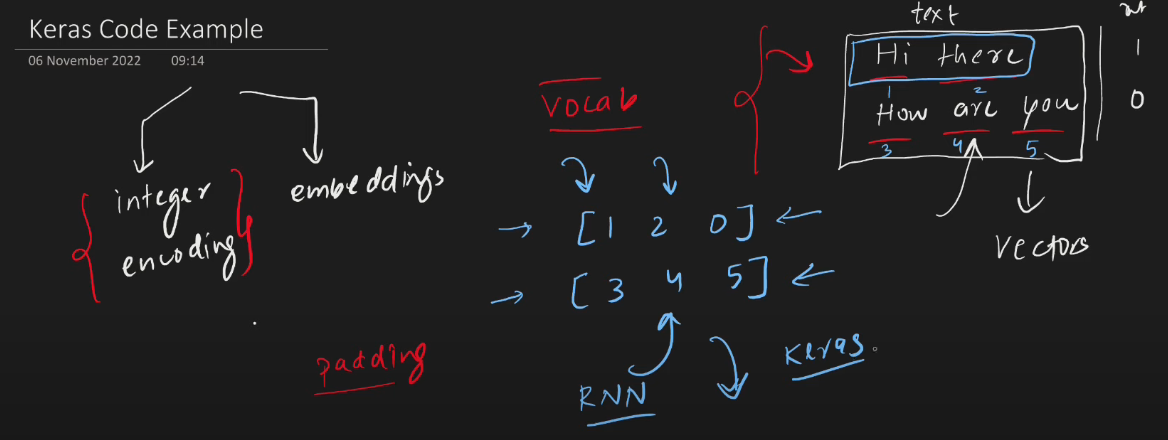

In [1]:
import numpy as np

docs = ['go india',
        'india india',
        'hip hip hurray',
        'jeetega bhai jeetega india jeetega',
        'bharat mata ki jai',
        'kohli',
        'sachin sachin',
        'dhoni dhoni',
        'modi ji  ki jai',
        'inquilab zindabad']

In [2]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(oov_token='<nothing>')

In [3]:
tokenizer.fit_on_texts(docs)

In [4]:
tokenizer.word_index

{'<nothing>': 1,
 'india': 2,
 'jeetega': 3,
 'hip': 4,
 'ki': 5,
 'jai': 6,
 'sachin': 7,
 'dhoni': 8,
 'go': 9,
 'hurray': 10,
 'bhai': 11,
 'bharat': 12,
 'mata': 13,
 'kohli': 14,
 'modi': 15,
 'ji': 16,
 'inquilab': 17,
 'zindabad': 18}

In [5]:
tokenizer.word_counts

OrderedDict([('go', 1),
             ('india', 4),
             ('hip', 2),
             ('hurray', 1),
             ('jeetega', 3),
             ('bhai', 1),
             ('bharat', 1),
             ('mata', 1),
             ('ki', 2),
             ('jai', 2),
             ('kohli', 1),
             ('sachin', 2),
             ('dhoni', 2),
             ('modi', 1),
             ('ji', 1),
             ('inquilab', 1),
             ('zindabad', 1)])

In [6]:
sequences = tokenizer.texts_to_sequences(docs)
sequences

[[9, 2],
 [2, 2],
 [4, 4, 10],
 [3, 11, 3, 2, 3],
 [12, 13, 5, 6],
 [14],
 [7, 7],
 [8, 8],
 [15, 16, 5, 6],
 [17, 18]]

In [7]:
from tensorflow.keras.utils import pad_sequences

In [8]:
sequences = pad_sequences(sequences,padding='post')

In [9]:
sequences

array([[ 9,  2,  0,  0,  0],
       [ 2,  2,  0,  0,  0],
       [ 4,  4, 10,  0,  0],
       [ 3, 11,  3,  2,  3],
       [12, 13,  5,  6,  0],
       [14,  0,  0,  0,  0],
       [ 7,  7,  0,  0,  0],
       [ 8,  8,  0,  0,  0],
       [15, 16,  5,  6,  0],
       [17, 18,  0,  0,  0]], dtype=int32)

In [10]:
from keras.datasets import imdb
from keras import Sequential
from keras.layers import Dense, SimpleRNN, Embedding, Flatten

In [11]:
(X_train, y_train), (X_test, y_test) = imdb.load_data()

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [12]:
y_test.shape

(25000,)

In [13]:
X_train = pad_sequences(X_train, padding='post', maxlen=100)
X_test = pad_sequences(X_test, padding='post', maxlen=100)


In [14]:
X_train.shape

(25000, 100)

In [60]:
model = Sequential()
model.add(SimpleRNN(32, input_shape=(100,1), return_sequences=True))
model.add(SimpleRNN(32, input_shape=(100,1), return_sequences=False))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_19"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_31 (SimpleRNN)       │ (None, 100, 32)        │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_32 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_33 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_34 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,257 (16.63 KB)

 Trainable params: 4,257 (16.63 KB)

 Non-trainable params: 0 (0.00 B)

In [61]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(X_train,y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 47s 56ms/step - accuracy: 0.5058 - loss: 0.6970 - val_accuracy: 0.5006 - val_loss: 0.6964
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 80s 54ms/step - accuracy: 0.5060 - loss: 0.6949 - val_accuracy: 0.5054 - val_loss: 0.6944
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 83s 56ms/step - accuracy: 0.5141 - loss: 0.6936 - val_accuracy: 0.5077 - val_loss: 0.6940
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 43s 54ms/step - accuracy: 0.4956 - loss: 0.6942 - val_accuracy: 0.5058 - val_loss: 0.6932
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 101s 78ms/step - accuracy: 0.4990 - loss: 0.6943 - val_accuracy: 0.5018 - val_loss: 0.6939


In [45]:
print("Max token index in X_train:", np.max(X_train))
print("Max token index in X_test:", np.max(X_test))

Max token index in X_train: 88586
Max token index in X_test: 88584


In [43]:
model1 = Sequential()
model1.add(Embedding(input_dim=88587, output_dim=8, input_length=200))  # <--- specify input_length
model1.add(SimpleRNN(32, return_sequences=True))
model1.add(SimpleRNN(32, return_sequences=False))
model1.add(Dense(32, activation='relu'))
model1.add(Dense(1, activation='sigmoid'))
model1.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_29 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_30 (SimpleRNN)       │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [44]:
model1.build(input_shape=(None, 200))  # Batch size is None (can vary), sequence length is 200
model1.summary()


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_13 (Embedding)        │ (None, 200, 8)         │       708,696 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_29 (SimpleRNN)       │ (None, 200, 32)        │         1,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_30 (SimpleRNN)       │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 32)             │         1,056 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 713,177 (2.72 MB)

 Trainable params: 713,177 (2.72 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
model1.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history1 = model1.fit(X_train,y_train, epochs=5, validation_data=(X_test, y_test))

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 99s 122ms/step - accuracy: 0.4985 - loss: 0.6947 - val_accuracy: 0.5013 - val_loss: 0.6934
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 91s 117ms/step - accuracy: 0.5088 - loss: 0.6949 - val_accuracy: 0.5072 - val_loss: 0.6891
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 93s 119ms/step - accuracy: 0.5719 - loss: 0.6642 - val_accuracy: 0.5919 - val_loss: 0.6316
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 120ms/step - accuracy: 0.6551 - loss: 0.5619 - val_accuracy: 0.6703 - val_loss: 0.6122
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 143s 122ms/step - accuracy: 0.6912 - loss: 0.4967 - val_accuracy: 0.6375 - val_loss: 0.6357


In [48]:
import matplotlib.pyplot as plt

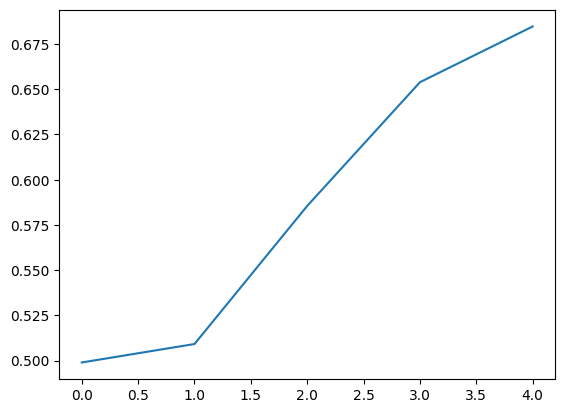

In [57]:
plt.plot(history1.history['accuracy'], label='Training Accuracy')


In [15]:
print("Max token index in X_train:", np.max(X_train))
print("Max token index in X_test:", np.max(X_test))

Max token index in X_train: 88586
Max token index in X_test: 88582


In [18]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense, Dropout
from tensorflow.keras.regularizers import l2

model2 = Sequential()
model2.add(Embedding(input_dim=88587, output_dim=64, input_length=100))

model2.add(SimpleRNN(32, return_sequences=True))
model2.add(Dropout(0.3))  # Dropout after RNN layer

model2.add(SimpleRNN(32, return_sequences=False))
model2.add(Dropout(0.3))  # Dropout after second RNN layer

model2.add(Dense(16, activation='relu', kernel_regularizer=l2(0.01)))  # L2 regularization
model2.add(Dropout(0.3))  # Dropout before output

model2.add(Dense(1, activation='sigmoid'))

model2.build(input_shape=(None, 100))
model2.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 64)        │     5,669,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, 100, 32)        │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 100, 32)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,675,297 (21.65 MB)

 Trainable params: 5,675,297 (21.65 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history2 = model2.fit(X_train,y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.5961 - loss: 0.6530 - val_accuracy: 0.6022 - val_loss: 0.6619
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 36s 20ms/step - accuracy: 0.7727 - loss: 0.4747 - val_accuracy: 0.7756 - val_loss: 0.4699
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9238 - loss: 0.1777 - val_accuracy: 0.7651 - val_loss: 0.5692
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 21ms/step - accuracy: 0.9595 - loss: 0.1105 - val_accuracy: 0.7194 - val_loss: 0.7855
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 19ms/step - accuracy: 0.9509 - loss: 0.1058 - val_accuracy: 0.5941 - val_loss: 0.9126
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 16s 20ms/step - accuracy: 0.9284 - loss: 0.1722 - val_accuracy: 0.7094 - val_loss: 0.8868
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 22s 22ms/step - accuracy: 0.9749 - loss: 0.0645 - val_accuracy: 0.6941 - val_loss: 1.1278
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.9893 - loss: 0.0272 - 

In [19]:
from tensorflow.keras.callbacks import EarlyStopping

model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

history2 = model2.fit(X_train, y_train,
                      epochs=10,
                      validation_data=(X_test, y_test),
                      callbacks=[early_stop])


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 25s 25ms/step - accuracy: 0.5111 - loss: 0.7999 - val_accuracy: 0.7112 - val_loss: 0.6086
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 15s 20ms/step - accuracy: 0.7131 - loss: 0.6019 - val_accuracy: 0.7272 - val_loss: 0.5827
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.7989 - loss: 0.4818 - val_accuracy: 0.7791 - val_loss: 0.4917
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 20ms/step - accuracy: 0.8483 - loss: 0.3846 - val_accuracy: 0.7685 - val_loss: 0.4865
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8742 - loss: 0.3230 - val_accuracy: 0.7815 - val_loss: 0.5234
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 17s 22ms/step - accuracy: 0.8986 - loss: 0.2614 - val_accuracy: 0.7800 - val_loss: 0.5169
